# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
# write your code here
from google.colab import files
files=files.upload()

Saving 5_a.csv to 5_a.csv


In [4]:
#Note 2: use pandas or numpy to read the data from 5_a.csv
sample_data= pd.read_csv('5_a.csv')
sample_data.head(10)


,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
5,1.0,0.601600
6,1.0,0.666323
7,1.0,0.567012
8,1.0,0.650230
9,1.0,0.829346


In [5]:
sample_data.describe()

,y,proba
count,10100.000000,10100.000000
mean,0.990099,0.697493
std,0.099015,0.114336
min,0.000000,0.500019
25%,1.000000,0.600532
50%,1.000000,0.697013
75%,1.000000,0.793915
max,1.000000,0.899965


In [6]:
#Note 1: in this data you can see number of positive points >> number of negatives points
sum_of_positive_points=sum(sample_data['proba']>0.5)
sum_of_positive_points

10100

In [7]:
#Note 3: you need to derive the class labels from given score
#ypred=[0 if y_score < 0.5 else 1], thresh_hold=0.5

def predict(data,y,thresh_hold): 
  y_hat=[]
  for label in data[y]:
    if label<thresh_hold:
      y_hat.append(0)
    else:
      y_hat.append(1)
  return y_hat

# 1. Compute confusion matrix:

def parameters(data,y,y_hat):
  tp=0
  tn=0
  fn=0
  fp=0
  for para1,para2 in enumerate(data['y']):
    if(data.y_hat[para1]==1) and data.y[para1]==1: 
      tp=tp+1
    if(data.y_hat[para1]==0) and data.y[para1]==0:
      tn=tn+1
    if(data.y_hat[para1]==0) and data.y[para1]==1:
      fn=fn+1
    if(data.y_hat[para1]==1) and data.y[para1]==0:
      fp=fp+1
  return {'tn':tn,'tp':tp,'fn':fn,'fp':fp}


In [8]:
thresh_hold=0.5
sample_data['y_hat']=predict(sample_data,'proba',thresh_hold)
confusion_matrix=parameters(sample_data,'y','y_hat')
confusion_matrix

{'fn': 0, 'fp': 100, 'tn': 0, 'tp': 10000}

In [8]:
 #2.Compute F1 Score:

In [27]:
x=sample_data.y
P=x[1]
z=sample_data.proba

precision= confusion_matrix['tp']/(confusion_matrix['tp']+confusion_matrix['fp'])
recall= confusion_matrix['tp']/(confusion_matrix['fn']+confusion_matrix['tp'])
f1_score=(2*precision*recall)/(precision+recall)
f1_score

0.9950248756218906

In [28]:
# Accuracy
Acc=(confusion_matrix['tp']+confusion_matrix['tn'])/sample_data.shape[0]
print('the accuracy is: ',Acc)
sample_data

the accuracy is:  0.9900990099009901


,y,proba,y_hat
1664,1.0,0.899965,1
2099,1.0,0.899828,1
1028,1.0,0.899825,1
9592,1.0,0.899812,1
8324,1.0,0.899768,1
...,...,...,...
8294,1.0,0.500081,1
1630,1.0,0.500058,1
7421,1.0,0.500058,1
805,1.0,0.500047,1


In [11]:
from tqdm import tqdm  # purpose of import tqdm is to just see progress
def auc(df):
  s = df['y'].value_counts()
  P = s[1]
  N = s[0]
  tpr = []
  fpr = []

  for i in tqdm(df['proba']):
    df['y_hat']=predict(df,'proba',i)
    confusion_matrix=parameters(df,'y','y_hat')
    tpr.append(confusion_matrix['tp']/P)
    fpr.append(confusion_matrix['fp']/N)
    df.drop(columns=['y_hat'])
  return np.trapz(tpr,fpr)

In [12]:
sample_data=sample_data.sort_values(by='proba',ascending=False)
sample_data.drop(columns=['y_hat'])

,y,proba
1664,1.0,0.899965
2099,1.0,0.899828
1028,1.0,0.899825
9592,1.0,0.899812
8324,1.0,0.899768
...,...,...
8294,1.0,0.500081
1630,1.0,0.500058
7421,1.0,0.500058
805,1.0,0.500047


In [107]:
from tqdm import tqdm
AUC_score=auc(sample_data)
print ('the AUC Score is :',AUC_score)

100%|██████████| 10100/10100 [1:54:17<00:00,  1.47it/s]

the AUC Score is : 0.48829900000000004


In [19]:
#comparing with sklearn: ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

from sklearn.metrics import roc_auc_score
sklearn_roc_auc_score = roc_auc_score(x, y)
sklearn_roc_auc_score

0.48829900000000004

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [12]:
#Compute Confusion Matrix:


In [3]:
import numpy as np
import pandas as pd

In [4]:
# write your code here
from google.colab import files
files=files.upload()

Saving 5_b.csv to 5_b.csv


In [5]:
df2= pd.read_csv("5_b.csv")
df2

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
...,...,...
10095,0.0,0.474401
10096,0.0,0.128403
10097,0.0,0.499331
10098,0.0,0.157616


In [6]:
print(df2.shape)
df2.head(10)

(10100, 2)


,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
5,0.0,0.190260
6,0.0,0.320328
7,0.0,0.435013
8,0.0,0.284849
9,0.0,0.427919


In [7]:
df2['y_pred'] = np.where(df2['proba'] >= 0.5, float(1), float(0))
df2.head()

,y,proba,y_pred
0,0.0,0.281035,0.0
1,0.0,0.465152,0.0
2,0.0,0.352793,0.0
3,0.0,0.157818,0.0
4,0.0,0.276648,0.0


In [8]:
# print(df2.to_numpy())
actual_y_train_arr = df2.iloc[:, 0].values
print('actual_y_train_arr ', actual_y_train_arr)

predicted_y_arr = df2.iloc[:, 2].values
print('predicted_y_arr ', predicted_y_arr)

y_proba = df2.iloc[:, 1].values

actual_y_train_arr  [0. 0. 0. ... 0. 0. 0.]
predicted_y_arr  [0. 0. 0. ... 0. 0. 0.]


In [123]:
 #Compute Confusion Matrix:

 def confusion_matrix(true_y_classes_array, predicted_y_classes_array):
  
  unique_classes = np.unique(true_y_classes_array)
  # For a binary class the above will give [0 1] numpy array

  # But the challenge here asks that the top left will be 'True Positive' so, reverse the above numpy array

  unique_classes = unique_classes[::-1]

  # initialize a matrix with zero values that will be the final confusion matrix
  # For the binary class-label dataset, this confusion matrix will be a 2*2 square matrix
  confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

  for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
      confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[j]) & (predicted_y_classes_array == unique_classes[i]))

  return confusion_matrix

confusion_matrix_5_b = confusion_matrix(actual_y_train_arr, predicted_y_arr)
print(confusion_matrix_5_b)

true_negative, false_positive, false_negative, true_positive = int(confusion_matrix_5_b[1][1]), int(confusion_matrix_5_b[0][1]), int(confusion_matrix_5_b[1][0]), int(confusion_matrix_5_b[0][0])


[[  55.  239.]
 [  45. 9761.]]


In [12]:
print("tp:",true_positive,'|' 'tn:',true_negative, "|" 'fp:',false_positive, "|" "fn:",false_negative )

tp: 55 |tn: 9761 |fp: 239 |fn: 45


In [13]:
# Testing my custom confusion_matrix result with scikit-learn
from sklearn.metrics import confusion_matrix
sklearn_confustion_matrix = confusion_matrix(actual_y_train_arr, predicted_y_arr)
print(sklearn_confustion_matrix)

[[9761  239]
 [  45   55]]


In [14]:
# the below function will work only for binary confusion matrix

tn=true_negative 
fp=false_positive  
fn=false_negative 
tp=true_positive  

precision = tp / (tp + fp)
recall = tp/ (tp + fn)
    
f1_score = (2 * (precision * recall)) / (precision + recall )
    
    
accuracy_score = (tp + tn)/df2.shape[0]
    
   # return f1_score, accuracy_score

print("F1_score:", f1_score)
print("Accuracy Score:", accuracy_score )

F1_score: 0.2791878172588833
Accuracy Score: 0.9718811881188119


In [15]:
#Verify F1 score & Accuracy:

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

sklearn_f1_score = f1_score(actual_y_train_arr, predicted_y_arr)
print('sklearn_f1_score ', sklearn_f1_score)

sklearn_accuracy_score = accuracy_score(actual_y_train_arr, predicted_y_arr)
print('sklearn_accuracy_score ', sklearn_accuracy_score)

sklearn_f1_score  0.2791878172588833
sklearn_accuracy_score  0.9718811881188119


In [19]:
def get_single_tpr_fpr(df):

    '''
    Note, this implementation is only for binaly class labels (0 and 1)
    :param df: the dataframe should have 'y' and 'y_predicted' as its labels
    :return: a list containing tpr and fpr
    '''

    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


def calculate_all_thresholds_tpr_fpr_arr(df_original):

    '''

    :param df_original: the original dataframe, which should have a 'proba' label
    :return: two arrays, tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds
    '''

    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df = df_original.sort_values(by=['proba'], ascending=False)

    unique_probability_thresholds = sorted_df['proba'].unique()

    for threshold in tqdm(unique_probability_thresholds):
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds

In [20]:
from tqdm import tqdm
all_tpr_together_5_b, all_fpr_together_5_b = calculate_all_thresholds_tpr_fpr_arr(df2)
auc_score_5_b = np.trapz(all_tpr_together_5_b, all_fpr_together_5_b)
print('ROC-AUC Score for df2: ', auc_score_5_b)

100%|██████████| 10100/10100 [00:43<00:00, 230.35it/s]

ROC-AUC Score for df2:  0.9377570000000001


In [22]:
from sklearn.metrics import roc_auc_score
sklearn_roc_auc_score = roc_auc_score(actual_y_train_arr, y_proba)
print('sk-learn roc_auc_score for df2: ', sklearn_roc_auc_score)

sk-learn roc_auc_score for 5_a.csv:  0.9377570000000001


Text(0.5, 1.0, 'AUC=0.9378')

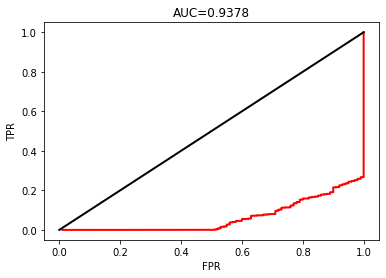

In [25]:
#Plot AUC ROC Curve:
import matplotlib.pyplot as plt
plt.plot(all_tpr_together_5_b, all_fpr_together_5_b, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_5_b, 4)))

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [27]:
 # write your code:
import numpy as np
import pandas as pd

In [28]:
from google.colab import files
files=files.upload()

Saving 5_c.csv to 5_c.csv


In [31]:
df3=pd.read_csv("5_c.csv")
df3.head(10)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [59]:
df3.describe()

,y,prob
count,2852.000000,2852.000000
mean,0.367111,0.370069
std,0.482102,0.207414
min,0.000000,0.028038
25%,0.000000,0.201460
50%,0.000000,0.336935
75%,1.000000,0.509001
max,1.000000,0.957747


In [51]:
sum_of_negative_points=sum(df3['y']==0)
print("No._of_negative_points:", sum_of_negative_points)

sum_of_positive_points=sum(df3['y']==1)
print("No._of_positive_points:", sum_of_positive_points)

No._of_negative_points: 1805
No._of_positive_points: 1047


In [77]:
actual_y_train_df3 = df3.iloc[:, 0].values
print('actual_y_train_arr_5_c ', actual_y_train_5_c)

y_proba_df3 = df3.iloc[:, 1].values
print('y_proba_5_c ', y_proba_5_c)

unique_probability_thresholds_df3= np.unique(df3['prob'])

actual_y_train_arr_5_c  [0 0 0 ... 1 1 1]
y_proba_5_c  [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [120]:
# compute the value of A

def get_A_metric(y_actual, y_prob, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    min_a = float('inf')

    for i in range(len(y_prob)):
        if y_prob[i] >= threshold:
            if y_actual[i] == 1:
                tp = tp+1
            else:
                fp =fp+1

        if y_prob[i] < threshold:
            if y_actual[i] == 0:
                tn = tn+1
            else:
                fn = fn+1

    A = (500 * fn) + (100 * fp)

    return A

In [121]:
#compute minimum value of A and also the corresponding threshold

def minimized(y_actual, y_prob, total_thresholds ):
  min_a = float('inf')
  min_t = 0

  for threshold in total_thresholds:
    a = get_A_metric(y_actual, y_prob, threshold)
    if a <= min_a:
        min_a = min(a, min_a)
        min_t = threshold

  return min_a, min_t

In [122]:
print(minimized(actual_y_train_df3, y_proba_df3, unique_probability_thresholds_df3))

(141000, 0.2300390278970873)


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [107]:
 # write your code:
import numpy as np
import pandas as pd

In [83]:
from google.colab import files
files=files.upload()

Saving 5_d.csv to 5_d.csv


In [108]:
df4=pd.read_csv("5_d.csv")
df4.head(10)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
5,133.0,153.0
6,148.0,139.0
7,172.0,145.0
8,153.0,162.0
9,162.0,154.0


In [109]:
# (df4.to_numpy()) convert to array so that I can apply numpy function

actual_y_df4= df4.iloc[:, 0].values
print('actual_y_arr_df4', actual_y_df4)

predicted_y_df4 = df4.iloc[:, 1].values
print('predicted_y_arr_df4 ', predicted_y_df4)

actual_y_arr_df4 [101. 120. 131. ... 106. 105.  81.]
predicted_y_arr_df4  [100. 100. 113. ...  93. 101. 104.]


In [110]:
#Compute Mean Square Error:
#Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk
#Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions 

def r2_score(y_t, y_predicted):
    y_avg = y_t.mean()     # y_avg = np.mean(y_t)

    sum_squared_res = ((y_t - y_predicted)**2).sum()
    sum_squared_total = ((y_t - y_avg)**2).sum()
    return 1 - (sum_squared_res/sum_squared_total)

h=print(r2_score(actual_y_df4, predicted_y_df4))
h

0.9563582786990937


In [111]:
def mse(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted)**2)
    return mse

print(mse(actual_y_df4, predicted_y_df4))

177.16569974554707


In [112]:
def mean_absolute_percentage_error(y_actual, y_predicted):
    mape = np.mean((np.abs(y_actual - y_predicted)) / np.mean(y_actual)) * 100
    return mape

print(mean_absolute_percentage_error(actual_y_df4, predicted_y_df4))

12.912029940096867
